In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from matplotlib.colors import ListedColormap


In [2]:
# 1. Generate a linearly separable dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42, cluster_std=1.5)


# 2. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Define a consistent C value for all models
C = 1.0


In [3]:
# 3. Train the classifiers
# Use 'squared_hinge' loss to be compatible with dual=False and penalty='l2'
lin_svc = LinearSVC(C=C, loss='squared_hinge', random_state=42, dual=False)
lin_svc.fit(X_scaled, y)


# SVC with a linear kernel
svc_linear = SVC(kernel='linear', C=C, random_state=42)
svc_linear.fit(X_scaled, y)


# SGDClassifier with hinge loss, adjusting alpha for comparability (alpha = 1/C)
sgd_clf = SGDClassifier(loss='hinge', alpha=1/C, random_state=42)
sgd_clf.fit(X_scaled, y)


,loss,'hinge'
,penalty,'l2'
,alpha,1.0
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [4]:
# 4. Compare the coefficients
print(f"LinearSVC Coefficients:   intercept={lin_svc.intercept_}, coef={lin_svc.coef_}")
print(f"SVC (linear) Coefficients: intercept={svc_linear.intercept_}, coef={svc_linear.coef_}")
print(f"SGDClassifier Coefficients: intercept={sgd_clf.intercept_}, coef={sgd_clf.coef_}")


LinearSVC Coefficients:   intercept=[0.11439763], coef=[[ 1.18184094 -0.89511527]]
SVC (linear) Coefficients: intercept=[0.22276202], coef=[[ 1.31256315 -1.10206315]]
SGDClassifier Coefficients: intercept=[-0.00417506], coef=[[ 0.49546097 -0.48519069]]


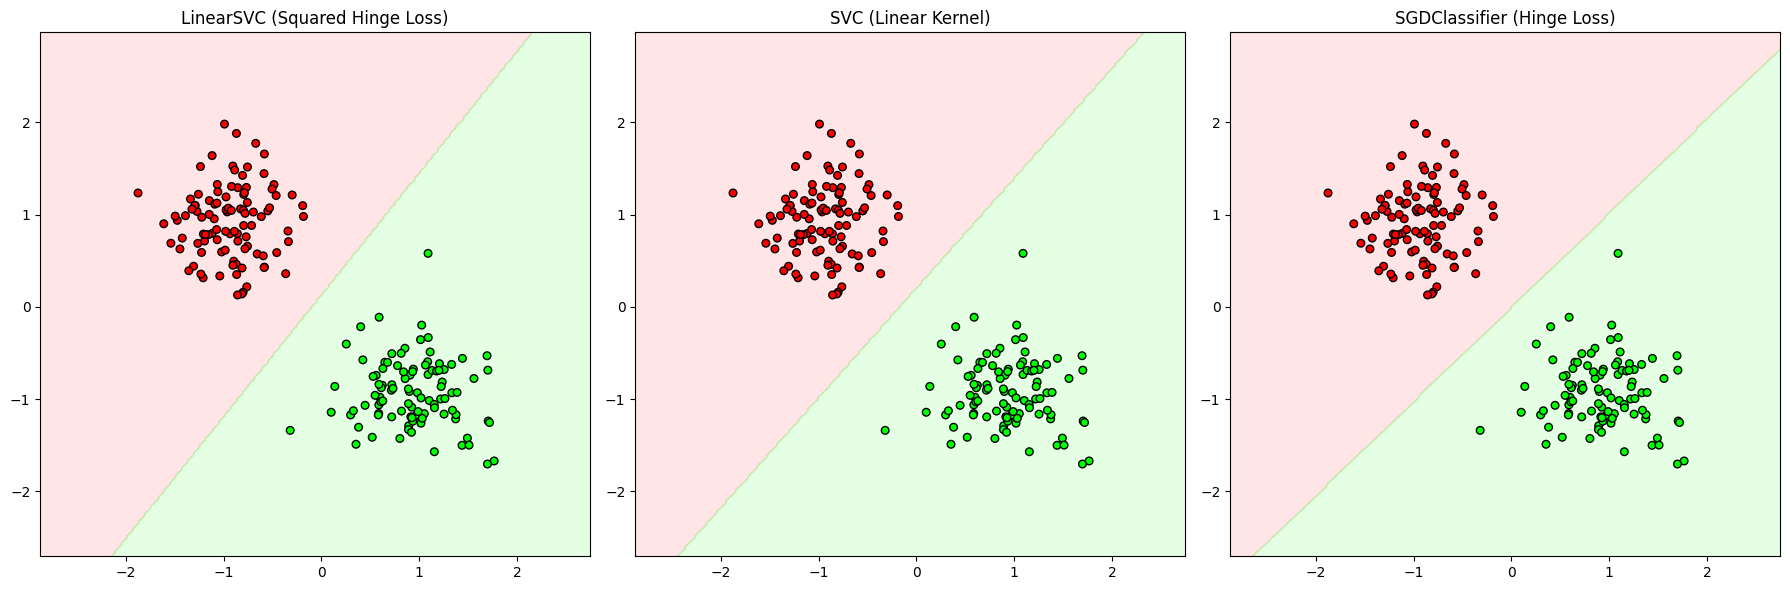

In [5]:
# 5. Visualize the decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    # Define colormaps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # Predict on the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    # Plot the results
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=30, edgecolor='k')
    ax.set_title(title)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))


plot_decision_boundary(lin_svc, X_scaled, y, axes[0], "LinearSVC (Squared Hinge Loss)")
plot_decision_boundary(svc_linear, X_scaled, y, axes[1], "SVC (Linear Kernel)")
plot_decision_boundary(sgd_clf, X_scaled, y, axes[2], "SGDClassifier (Hinge Loss)")


plt.tight_layout()
plt.show()
